In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, precision_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

# Naive Bayes

In [25]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con las características y etiquetas
df = pd.DataFrame(data=iris.data, columns=['sepal_length', ' sepal_width', ' petal_length', ' petal width'])
df['class'] = iris.target  # Agregar la columna de etiquetas al DataFrame

df.head()

,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# Separar el conjunto de caracteristicas 'X' y la variable objetivo 'Y'
attributes = df.drop(['class'], axis=1)
target = df['class']

In [27]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=6)
Y_train = X_train['class']
y_test = X_test['class']

print('tamaño de los datos')
print('train: ', X_train.shape[0])
print('test: ', X_test.shape[0])
print('total: ', X_train.shape[0] + X_test.shape[0])

tamaño de los datos
train:  105
test:  45
total:  150


In [28]:
#Entrenar el modelo
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    Y_train
)

GaussianNB()

In [29]:
#Aplicar modelo a los datos de test
y_pred = gnb.predict(X_test)

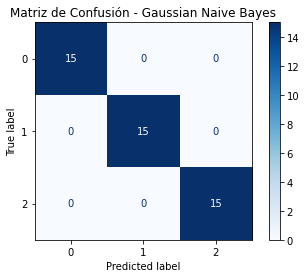

In [30]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gnb.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Gaussian Naive Bayes')
plt.show()

In [38]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}\n')

# Calcular el error de clasificación
classification_error = 1 - accuracy
print(f'Error de clasificación del modelo: {classification_error}\n')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision}\n')

# Calcular el índice de recuperación del modelo
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Índice de recuperación del modelo: {recall}\n')

# Calcular la medida F1 del modelo
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Medida F1 del modelo: {f1}\n')



Exactitud del modelo: 1.0

Error de clasificación del modelo: 0.0

Precisión del modelo: 1.0

Índice de recuperación del modelo: 1.0

Medida F1 del modelo: 1.0



Observando las mediciones del modelo gausiano, podemos ver que tomando una muestra del 70% par entrenar y 30% para testear, el modelo tuvo un desempeño perfect, teniendo una exactitud, precisión, recall y F1 de 1. El modelo tuvo un error de 0

# Arboles de Decisión


1. Leer los datos

In [6]:
nba = pd.read_csv('./nba.txt',skiprows=27,delim_whitespace=True)
nba

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,14,0,12.0,0.414,0.000,0.478,0.9,1.9,2.8,0.2,0.5,0.4,1.1,1.6,2.5,2
304,19,0,5.8,0.444,0.000,0.417,0.8,1.2,2.1,0.0,0.2,0.8,0.3,0.7,1.5,2
305,43,5,14.7,0.507,0.000,0.652,1.5,2.1,3.6,0.3,0.5,0.4,0.5,1.4,4.6,2
306,137,29,14.4,0.511,0.000,0.624,1.3,2.1,3.4,0.3,0.3,1.2,0.9,2.4,4.2,2


2. Particion del dataset y entrenamiento

In [10]:
X_train, X_test,y_train,y_test = train_test_split(nba.iloc[:,:-1],nba.iloc[:,-1], test_size=0.3, random_state=6)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

3. Verificacion de resultados

In [11]:
y_pred = clf.predict(X_test)

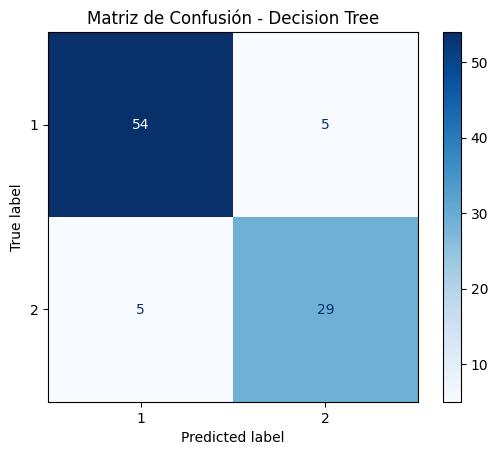

In [14]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Decision Tree')
plt.show()

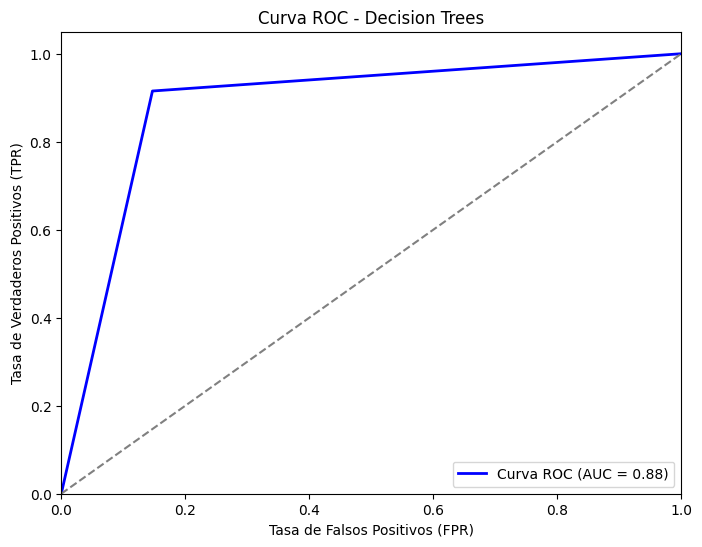

In [25]:

# Obtener las probabilidades de predicción para la clase positiva
y_pred_prob = clf.predict_proba(X_test)[:, 0]

# Calcular la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label=[1])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Decision Trees')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy}\n')

# Calcular el error de clasificación
classification_error = 1 - accuracy
print(f'Error de clasificación del modelo: {classification_error}\n')

# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión del modelo: {precision}\n')

# Calcular el índice de recuperación del modelo
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Índice de recuperación del modelo: {recall}\n')

# Calcular la medida F1 del modelo
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Medida F1 del modelo: {f1}\n')

# Calcular la medida AUC
roc_auc = auc(fpr, tpr)
print(f'Medida ROC AUC del modelo: {roc_auc}\n')


Exactitud del modelo: 0.8924731182795699

Error de clasificación del modelo: 0.10752688172043012

Precisión del modelo: 0.8924731182795699

Índice de recuperación del modelo: 0.8924731182795699

Medida F1 del modelo: 0.8924731182795699

Medida ROC AUC del modelo: 0.8840977068793618



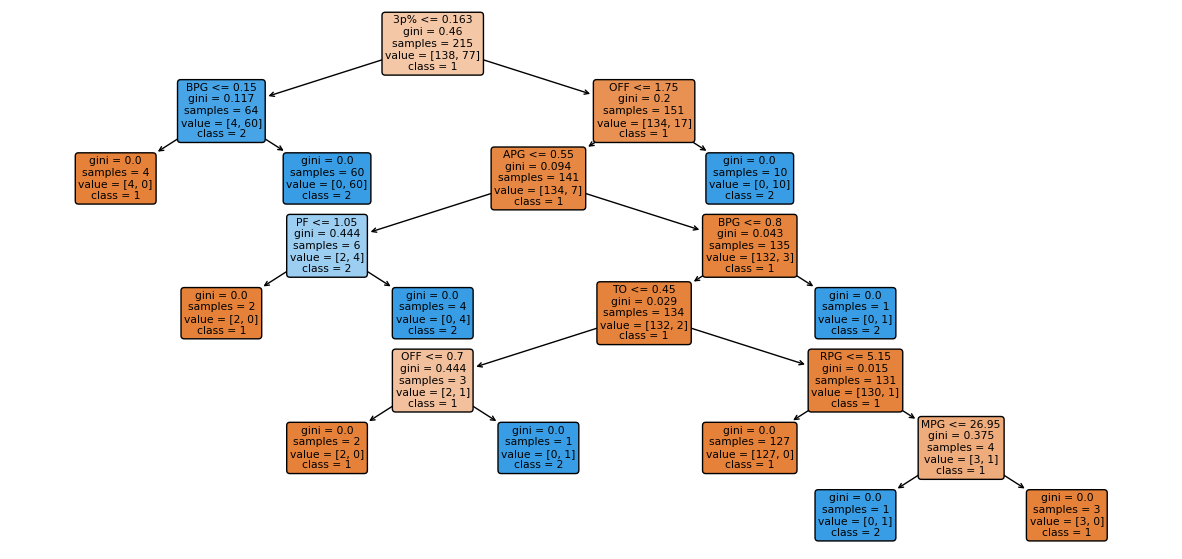

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(15,7))
_ = tree.plot_tree(clf,feature_names = nba.columns,
                   filled=True,class_names=['1','2'], rounded=True, )

1. La primera division es la mas determinante, este es 3p%, es el porcentaje de tiro de tres puntos, con un gini de 0.46, siendo valores cercanos a 0 los de mayor pureza, es decir que se clasifican los datos en grupos de mayor similitud, en este caso el arbol se optimiza tal que el atributo con mayor pureza resulta ser 3p%.
2.  A partir del arbol tambien podemos generar las siguientes reglas :  

    a. Si 3%p es menor o igual a 0.163, seguido de si los bloqueos por juego son menores o iguales 0.15 el tipo de jugador es clasificado como perimetral.

    b. Si 3%p es menor o igual a 0.163, seguido de si los bloqueos por juego son mayores 0.15 el tipo de jugador es clasificado como interno.
 
    c. Si 3%p mayor a 0.163, y el numero de rebotes ofensivos son mayores a 1.75, el tipo de jugador es clasificado como interno.

Complejidad del model y sobre apredizaje

1. desempeño en set de entrenamiento. en la siguiente celda se ve el desempeño es " perfecto " no se tienen errores, el modelo esta sobre entrenado para el set de entrenamiento.

In [51]:
y_pred = clf.predict(X_train)
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_train, y_pred)
print(f'Exactitud del modelo: {accuracy}\n')

# Calcular el error de clasificación
classification_error = 1 - accuracy
print(f'Error de clasificación del modelo: {classification_error}\n')

# Calcular la precisión del modelo
precision = precision_score(y_train, y_pred, average='weighted')
print(f'Precisión del modelo: {precision}\n')

# Calcular el índice de recuperación del modelo
recall = recall_score(y_train, y_pred, average='weighted')
print(f'Índice de recuperación del modelo: {recall}\n')

# Calcular la medida F1 del modelo
f1 = f1_score(y_train, y_pred, average='weighted')
print(f'Medida F1 del modelo: {f1}\n')


Exactitud del modelo: 1.0

Error de clasificación del modelo: 0.0

Precisión del modelo: 1.0

Índice de recuperación del modelo: 1.0

Medida F1 del modelo: 1.0



In [52]:
train_err = []
test_err = []

for depth in range(1,11):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred)
    classification_error_train = 1 - accuracy_train

    train_err.append(classification_error_train)

    y_pred = clf.predict(X_test)
    accuracy_test= accuracy_score(y_test, y_pred)

    classification_error_test = 1 - accuracy_test

    test_err.append(classification_error_test)


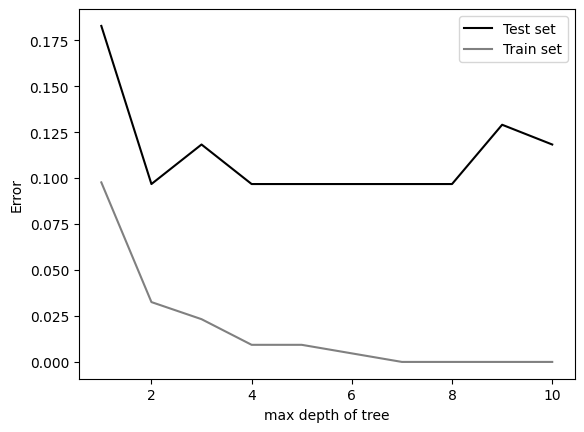

In [56]:
plt.plot([i for i in range(1,11)],test_err,color='black',label='Test set')
plt.plot([i for i in range(1,11)],train_err,color='grey',label='Train set')
plt.xlabel('max depth of tree')
plt.ylabel('Error')
plt.legend()

Se busca que la profundidad no sea grande, pero a la vez que el error sea mimimo en ambos sets de entrenamiento, por lo que una profundidad de 7 serviria para tener un valor de error de 0 para el set de entrenamiento, mientras un valor de 0.097. 

In [79]:
train_err = []
test_err = []

for percentage in range(90,0,-10):
    clf = DecisionTreeClassifier(max_depth=7)
    X_train, X_test,y_train,y_test = train_test_split(nba.iloc[:,:-1],nba.iloc[:,-1], test_size=percentage/100, random_state=6)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)

    accuracy_train = accuracy_score(y_train, y_pred)
    classification_error_train = 1 - accuracy_train

    train_err.append(classification_error_train)

    y_pred = clf.predict(X_test)
    accuracy_test= accuracy_score(y_test, y_pred)

    classification_error_test = 1 - accuracy_test

    test_err.append(classification_error_test)

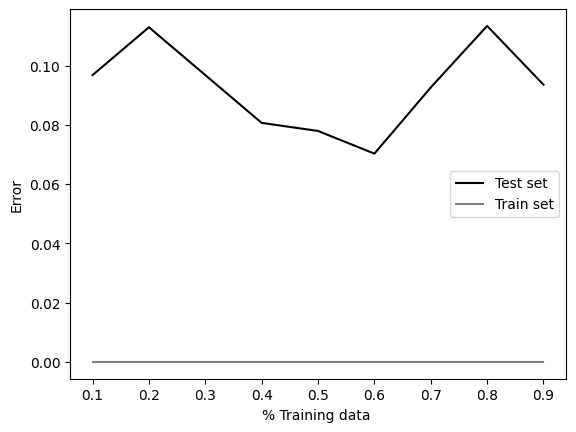

In [81]:
plt.plot([percentage/100 for percentage in range(90,0,-10)],test_err,color='black',label='Test set')
plt.plot([percentage/100 for percentage in range(90,0,-10)],train_err,color='grey',label='Train set')
plt.xlabel('% Training data ')
plt.ylabel('Error')
plt.legend()

Para todos los valores de particion el set de entrenamiento tiene un error de 0.  Mientras que para el set de testeo el menor valor esta en 60% de datos de entrenamiento. Se puede ver a demas que hay unos picos en 20% y 80% en la curva de testeo.

# KNN

In [39]:
from collections import Counter
import numpy as np

# Datos de entrada
X = np.array([
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 1, 0, 0]
])

# Etiquetas de los grupos
labels = np.array(['C1', 'C1', 'C2', 'C2', 'C1', 'C2'])

# Función para calcular la distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Función k-NN
def k_nearest_neighbors(X, y, query_point, k):
    distances = [euclidean_distance(query_point, x) for x in X]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Ejemplos a clasificar
queries = [
    np.array([1, 1, 0, 1, 1]),
    np.array([1, 1, 0, 1, 1]),
    np.array([0, 1, 0, 0, 0]),
    np.array([0, 1, 0, 0, 0])
]

# Realizar la clasificación con k-NN para cada ejemplo
for i, query in enumerate(queries, start=1):
    k_values = [1, 3, 1, 5]
    for j, k in enumerate(k_values, start=1):
        result = k_nearest_neighbors(X, labels, query, k)
        print(f"Resultado para Y={query} con K={k} es: {result}")


Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=3 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=5 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=3 es: C1
Resultado para Y=[1 1 0 1 1] con K=1 es: C1
Resultado para Y=[1 1 0 1 1] con K=5 es: C1
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=3 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=5 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=3 es: C2
Resultado para Y=[0 1 0 0 0] con K=1 es: C2
Resultado para Y=[0 1 0 0 0] con K=5 es: C2


Para el primer ejemplo [1, 1, 0, 1, 1], sin importar el valor de k utilizado (1, 3 o 5), el algoritmo predijo que pertenece al grupo C1. Esto indica que los puntos más cercanos a este ejemplo pertenecen principalmente al grupo C1.

Para el segundo ejemplo [0, 1, 0, 0, 0], nuevamente, independientemente del valor de k (1, 3 o 5), el algoritmo predijo consistentemente que pertenece al grupo C2. Esto sugiere que los puntos más cercanos a este ejemplo son predominantemente del grupo C2.

Podemos concluir que los datos de cada cluster son consistentes y tienen una separación clara

# Comparación de módelos

In [48]:

# Descargar el conjunto de datos desde una URL (si no lo tienes localmente)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Definir los nombres de las columnas para el dataset
column_names = [
    "Status of existing checking account", "Duration in months", "Credit history", 
    "Purpose", "Credit amount", "Savings account/bonds", "Present employment since", 
    "Installment rate in percentage of disposable income", "Personal status and sex", 
    "Other debtors / guarantors", "Present residence since", "Property", "Age", 
    "Other installment plans", "Housing", "Number of existing credits at this bank", 
    "Job", "Number of people being liable to provide maintenance for", "Telephone", 
    "Foreign worker", "Credit risk"
]

# Cargar el conjunto de datos en un DataFrame de pandas
data = pd.read_csv(url, delimiter=' ', names=column_names)

# Mostrar información básica del conjunto de datos
print("Información sobre el conjunto de datos German Credit:")
print(data.head().to_string())  # Muestra las primeras filas del conjunto de datos
print(data.shape)   # Muestra la forma (número de filas y columnas) del conjunto de datos


Información sobre el conjunto de datos German Credit:
  Status of existing checking account  Duration in months Credit history Purpose  Credit amount Savings account/bonds Present employment since  Installment rate in percentage of disposable income Personal status and sex Other debtors / guarantors  Present residence since Property  Age Other installment plans Housing  Number of existing credits at this bank   Job  Number of people being liable to provide maintenance for Telephone Foreign worker  Credit risk
0                                 A11                   6            A34     A43           1169                   A65                      A75                                                    4                     A93                       A101                        4     A121   67                    A143    A152                                        2  A173                                                         1      A192           A201            1
1                       

In [49]:
# Naive bayes con validación cruzada

X = data.drop('Credit risk', axis=1)  # Características
y = data['Credit risk']  # Etiquetas

# Convertir las variables categóricas a numéricas si es necesario
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

### Naive Bayes

In [50]:
# Inicializar el clasificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()

# Realizar validación cruzada con tamaño 10 para evaluar el modelo
scores = cross_val_score(naive_bayes, X, y, cv=10)

# Mostrar los puntajes de la validación cruzada
print("Puntajes de validación cruzada:", scores)
print(f"Puntuación media: {scores.mean():.4f}")

Puntajes de validación cruzada: [0.72 0.66 0.76 0.68 0.74 0.78 0.69 0.74 0.78 0.79]
Puntuación media: 0.7340


### Árbol de Decisión

In [60]:
# Inicializar el clasificador de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=32)

# Realizar validación cruzada para evaluar el modelo
scores = cross_val_score(decision_tree, X, y, cv=10)

# Mostrar los puntajes de la validación cruzada
print("Puntajes de validación cruzada:", scores)
print(f"Puntuación media: {scores.mean():.4f}")

Puntajes de validación cruzada: [0.63 0.62 0.75 0.72 0.64 0.66 0.66 0.71 0.65 0.71]
Puntuación media: 0.6750


### Comparación

Para este dataset, el rendimiento de Naive Bayes fue mayor al del Árbol de decisión. Esto puede deberse a la naturaleza de los datos. Naive Bayes supone la independencia condicional entre los atributos. lo que para este dataset funcina. Los arboles de decisión pueden tener dificultades cuando el dataset tien ruido o outliers. Esto puede ser un factor determinante en el ejercicio.    

# Clasificación con costos


In [103]:
data = pd.read_csv('./german.data-numeric',delim_whitespace=True,header=None)
data[24] = data[24].map({1:'Good',2:'Bad'})
data.to_csv('./german.csv',index_label='index')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   int64 
 1   1       1000 non-null   int64 
 2   2       1000 non-null   int64 
 3   3       1000 non-null   int64 
 4   4       1000 non-null   int64 
 5   5       1000 non-null   int64 
 6   6       1000 non-null   int64 
 7   7       1000 non-null   int64 
 8   8       1000 non-null   int64 
 9   9       1000 non-null   int64 
 10  10      1000 non-null   int64 
 11  11      1000 non-null   int64 
 12  12      1000 non-null   int64 
 13  13      1000 non-null   int64 
 14  14      1000 non-null   int64 
 15  15      1000 non-null   int64 
 16  16      1000 non-null   int64 
 17  17      1000 non-null   int64 
 18  18      1000 non-null   int64 
 19  19      1000 non-null   int64 
 20  20      1000 non-null   int64 
 21  21      1000 non-null   int64 
 22  22      1000 non-null   i

In [102]:
data[24][0]

'A'

In [ ]:


# === Stratified cross-validation ===
# === Summary ===

# Correctly Classified Instances         757               75.7    %
# Incorrectly Classified Instances       243               24.3    %
# Kappa statistic                          0.3894
# Mean absolute error                      0.2891
# Root mean squared error                  0.42  
# Relative absolute error                 68.812  %
# Root relative squared error             91.6456 %
# Total Number of Instances             1000     

# === Detailed Accuracy By Class ===

#                  TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
#                  0,866    0,497    0,803      0,866    0,833      0,393    0,786     0,892     Good
#                  0,503    0,134    0,616      0,503    0,554      0,393    0,786     0,586     Bad
# Weighted Avg.    0,757    0,388    0,747      0,757    0,749      0,393    0,786     0,800     

# === Confusion Matrix ===

#    a   b   <-- classified as
#  606  94 |   a = Good
#  149 151 |   b = Bad



El modelo tiene 94 falsos positivos. Mientras que tiene 149 falsos negativos. Se esta evaluando que tan buen deudor es un cliente de acuerdo a factores personales como la edad, su estatus de empleo y factores economicos, como su historial crediticio. Segun la documentacion se indica que es peor clasificar un mal deudor como bueno, que clasificar un buen deudor como malo, esto tiene sentido ya que se quieren evitar perdidas, y prestar dinero a un mal deudor incurre en mayores perdidas. A continuacion se añade el costo en Weka para los falsos positivos, de 10. 


![alt text](./weka_classification.png)

In [ ]:
# === Stratified cross-validation ===
# === Summary ===

# Correctly Classified Instances         617               61.7    %
# Incorrectly Classified Instances       383               38.3    %
# Kappa statistic                          0.2944
# Total Cost                             552.5   
# Average Cost                             0.5525
# Mean absolute error                      0.4063
# Root mean squared error                  0.5243
# Relative absolute error                 96.6887 %
# Root relative squared error            114.4116 %
# Total Number of Instances             1000     

# === Detailed Accuracy By Class ===

#                  TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
#                  0,507    0,127    0,903      0,507    0,650      0,357    0,786     0,892     Good
#                  0,873    0,493    0,432      0,873    0,578      0,357    0,786     0,586     Bad
# Weighted Avg.    0,617    0,237    0,762      0,617    0,628      0,357    0,786     0,800     

# === Confusion Matrix ===

#    a   b   <-- classified as
#  355 345 |   a = Good
#   38 262 |   b = Bad

Los resultados son de mayores falsos negativos, y menores falsos positivos, en este caso se obtuvo mayor clasificación para los verdaderos negativos, y una menor clasificación para los verdaderos positivos. Como se esperaba las medidas de , FP Rate  ,Precision  ,Recall  y F-Measure aumentaron para la clase negativa, la cual es más importante evitar errores. 